Objective of this script is to identify critical factors using Random Forest.

Problem & Data: https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/

In [1]:
# Import Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

In [2]:
# Loading the data
train=pd.read_csv('C:/Users/rm634391/Desktop/Kaggle/BigMart/train.csv')

In [3]:
# checking the percentage of missing values in each variable
train.isnull().sum()/len(train)*100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [4]:
# saving missing values in a variable
a = train.isnull().sum()/len(train)*100

In [5]:
# saving column names in a variable
variables = train.columns
variable = [ ]
for i in range(0,12):
    if a[i]<=20:   #setting the threshold as 20%
        variable.append(variables[i])

In [6]:
# performing imputations to fill null values
train['Item_Weight'].fillna(train['Item_Weight'].median(), inplace=True)
train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0], inplace=True)

In [7]:
# Ensuring null values are filled
train.isnull().sum()/len(train)*100

Item_Identifier              0.0
Item_Weight                  0.0
Item_Fat_Content             0.0
Item_Visibility              0.0
Item_Type                    0.0
Item_MRP                     0.0
Outlet_Identifier            0.0
Outlet_Establishment_Year    0.0
Outlet_Size                  0.0
Outlet_Location_Type         0.0
Outlet_Type                  0.0
Item_Outlet_Sales            0.0
dtype: float64

In [8]:
# Dropping the dependent column
df=train.drop('Item_Outlet_Sales', 1)

C:\Users\rm634391\AppData\Local\Temp\ipykernel_11132\1978471891.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df=train.drop('Item_Outlet_Sales', 1)


In [9]:
# Dropping the column that are not required
df=df.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1)

In [10]:
# Instantiating the regressor model
model = RandomForestRegressor(random_state=1, max_depth=10)

In [11]:
# Converting categorical variable into dummy/indicator variables.
df=pd.get_dummies(df)

In [12]:
# Fitting the model
model.fit(df,train.Item_Outlet_Sales)

RandomForestRegressor(max_depth=10, random_state=1)

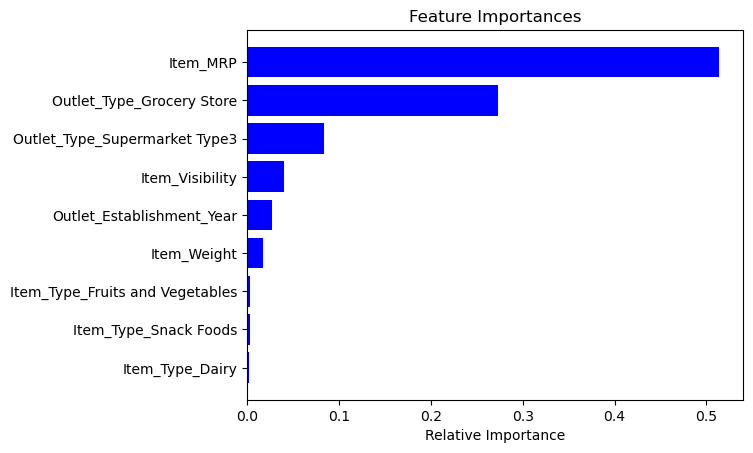

In [13]:
# Plotting the top 10 important features
features = df.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-9:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()